<a href="https://colab.research.google.com/github/ericgbraz/COLAB_PED/blob/main/PED_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import numpy as np
#conexao = sqlite3.connect(':memory:') 
conexao = sqlite3.connect('aluno.db') 
cursor = conexao.cursor()

sql = 'create table aluno('\
'idAluno integer primary key autoincrement,'\
'nome varchar(100) not null,'\
'sexo char)'
cursor.execute(sql)



In [ ]:
sql = 'insert into aluno (nome, sexo) values(?,?)'
cursor.execute(sql, ['Alexandre', 'M']) #insere apenas um registro
conexao.commit()


In [ ]:
alunos = [['Sílvia', 'F'], ['Carlos','M'], ['Maria', 'F'], ['João', np.NaN]]

#inserindo diversos registros
for aluno in alunos:
    cursor.execute(sql, aluno)

conexao.commit()

In [ ]:
sql = 'select * from aluno'

cursor.execute(sql)
alunos = cursor.fetchall()

print(alunos)

for aluno in alunos:
    print(aluno)


[(1, 'Alexandre', 'M')]
(1, 'Alexandre', 'M')


In [ ]:
sql = 'update aluno '\
' set nome = ?'\
' where idAluno = ?'

cursor.execute(sql, ['Alexandre Siqueira Dias', 1]) 

conexao.commit()




[]


In [ ]:
cursor.execute('select * from aluno')
alunos = cursor.fetchall()

print(alunos)

[(1, 'Alexandre Siqueira Dias', 'M')]


In [ ]:
sql = 'delete from aluno where idAluno = ?'
cursor.execute(sql, [1]) 
conexao.commit()


In [ ]:
cursor.execute('select * from aluno')
alunos = cursor.fetchall()

print(alunos)

[(2, 'Sílvia', 'F'), (3, 'Carlos', 'M'), (4, 'Maria', 'F'), (5, 'João', None)]


In [ ]:
sql = 'select * from aluno where idaluno >= ? and sexo = ?'

cursor.execute(sql, [2, 'F'])
alunos = cursor.fetchall()

for id, nome, sexo in alunos: #acessando cada campo individualmente
    print(id, nome, sexo)


2 Sílvia F
4 Maria F


In [ ]:
sql = 'select * from aluno where sexo is null'

cursor.execute(sql)
alunos = cursor.fetchall()

print(alunos)


[(5, 'João', None)]


In [ ]:
import pandas as pd
import sqlite3

# Carregando dados do SQLite para o pandas
df = pd.read_sql_query("SELECT * from aluno", conexao)

df


,idAluno,nome,sexo
0,2,Sílvia,F
1,3,Carlos,M
2,4,Maria,F
3,5,João,None


<Axes: >

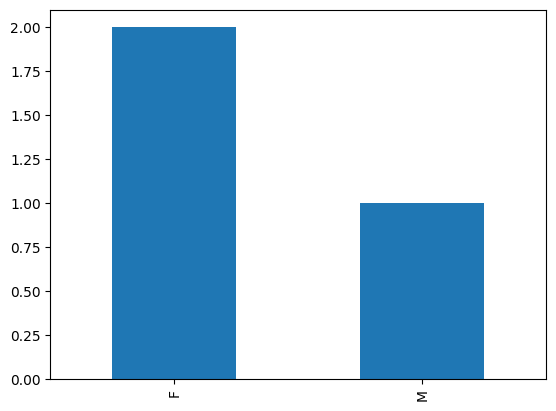

In [ ]:
import pandas as pd
import sqlite3

# Carregando dados do SQLite para o pandas
df = pd.read_sql_query("SELECT * from aluno", conexao)

df['sexo'].value_counts()

df['sexo'].value_counts().plot(kind = 'bar')


In [ ]:
import pandas as pd
df = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')

import sqlite3
conn = sqlite3.connect('weather.db')
df.to_sql('temperatura', conn, if_exists='replace') #{'fail', 'replace', 'append'}, default 'fail'



748

In [ ]:
import pandas as pd
df = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')

import sqlite3
conn = sqlite3.connect('weather.db')
df.to_sql('temperatura_new', conn, if_exists='replace', index = False) #{'fail', 'replace', 'append'}, default 'fail'


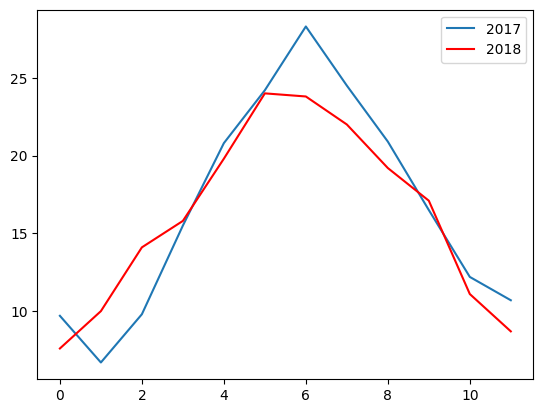

In [ ]:
y2018 = pd.read_sql('SELECT * FROM temperatura WHERE Year == 2018', conn)
y2017 = pd.read_sql('SELECT * FROM temperatura WHERE Year == 2017', conn)

ax2018 = y2018.plot(y = 'Tmax')
ax = y2017.plot(y='Tmax' ,color = 'red', ax=ax2018)
ax.legend(['2017','2018'])


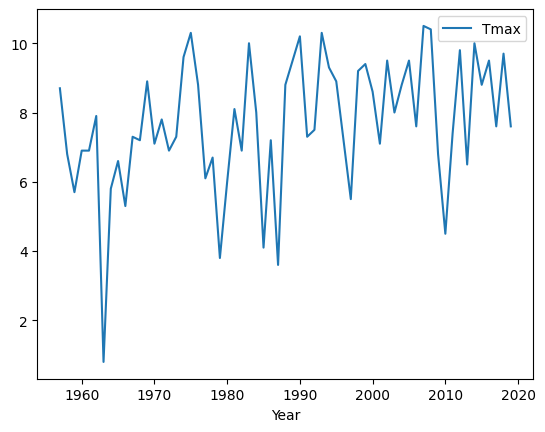

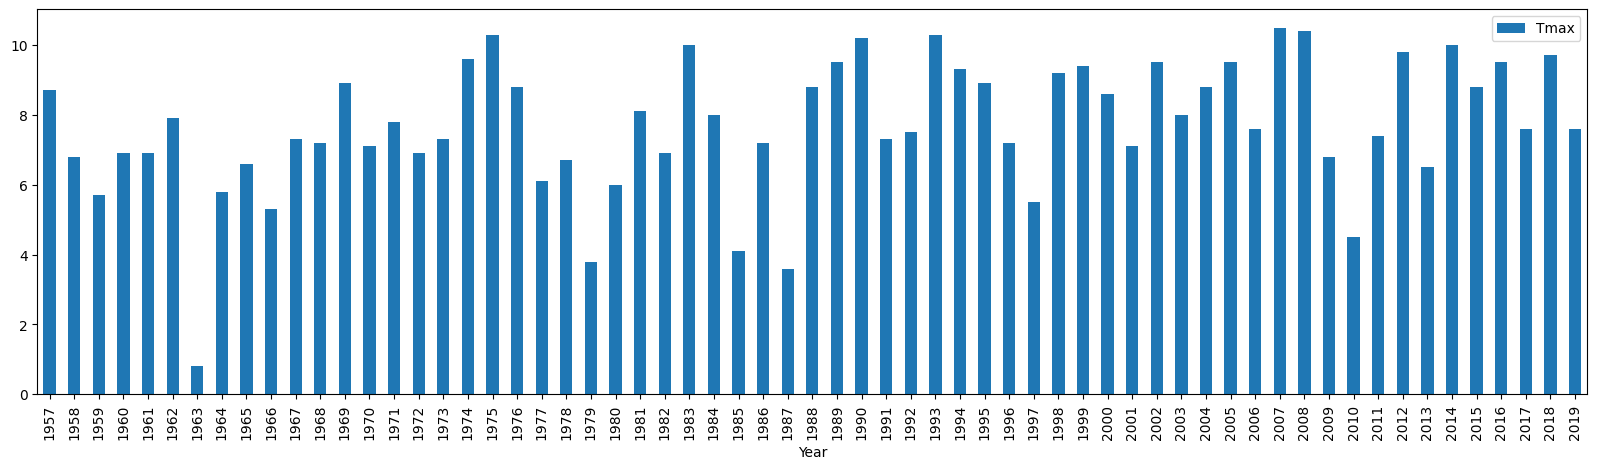

In [ ]:
mesJaneiro = pd.read_sql('SELECT year, tmax FROM temperatura WHERE month = 1', conn)
#Gráfico de linhas
mesJaneiro.plot(y='Tmax', x = 'Year')

#Gráfico de barras
mesJaneiro.plot(y='Tmax', x = 'Year', kind = 'bar', figsize=(20,5));

<Axes: >

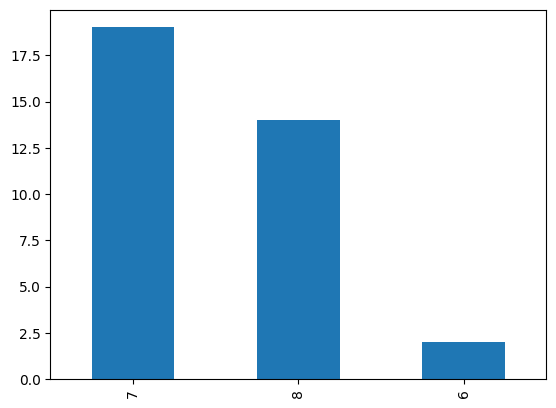

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
mesMaior = pd.read_sql('SELECT Month, tmax FROM temperatura WHERE tmax > 24', conn)

mesMaior['Month'].value_counts()
mesMaior['Month'].value_counts().plot(kind = 'bar')


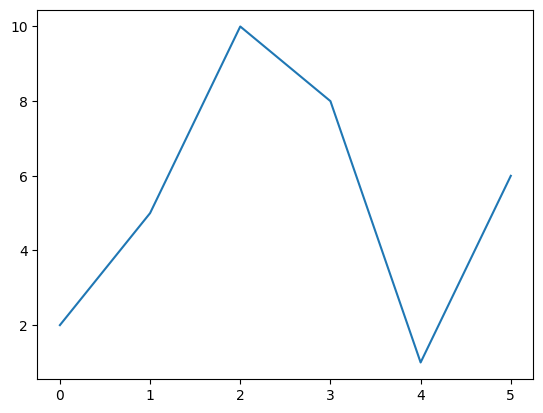

In [1]:
import matplotlib.pyplot as plt
plt.plot([2, 5, 10, 8, 1, 6])
plt.plot([2, 5, 10, 8, 1, 6], 'c*:');



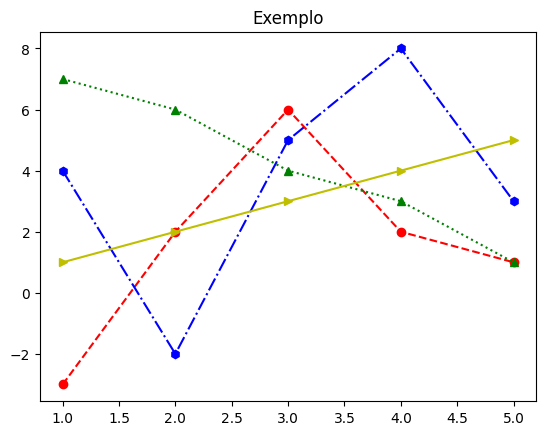

In [8]:
x = [1, 2, 3, 4, 5]
y1 = [-3, 2, 6, 2, 1]
y2 = [4, -2, 5, 8, 3]
y3 = [7, 6, 4, 3, 1]
y4 = [1, 2, 3, 4, 5]

plt.plot(x, y1, 'ro--', x, y2, 'bh-.', x, y3, 'g^:', x, y4, 'y>-')
plt.title("Exemplo");


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')

weather.head()

# Pegando a numeração dos meses avaliados
x_periodo = weather[weather['Year'] == 1957].Month
x_periodo = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

# Pegando os dados de temperaturas
y_temperaturas_1957 = weather[weather['Year'] == 1957].Tmax
y_temperaturas_1977 = weather[weather['Year'] == 1977].Tmax
y_temperaturas_1997 = weather[weather['Year'] == 1997].Tmax
y_temperaturas_2017 = weather[weather['Year'] == 2017].Tmax


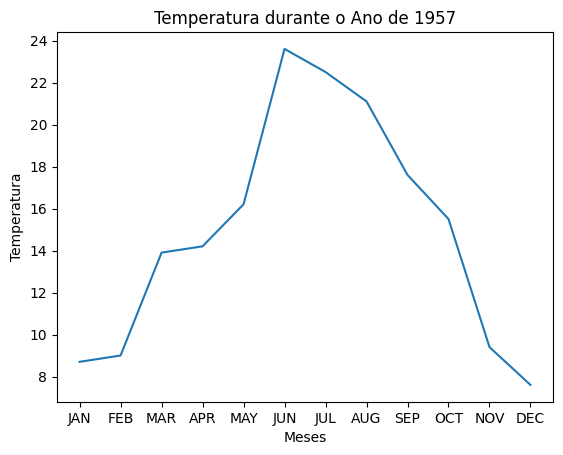

In [24]:
plt.plot(x_periodo, y_temperaturas_1957)
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses");



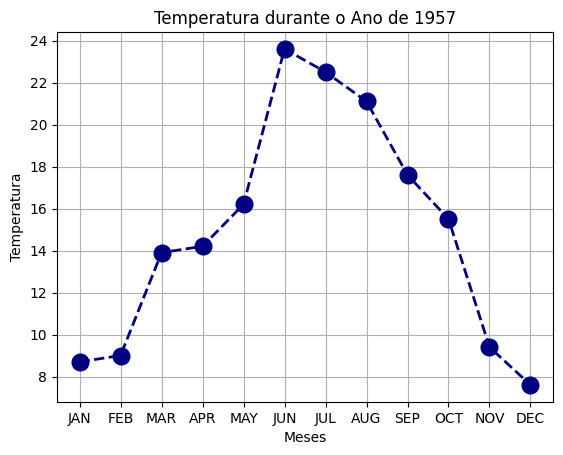

In [25]:
plt.plot(x_periodo, y_temperaturas_1957, color='navy', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid();#axis=‘both’,’x’ou ’y’ 




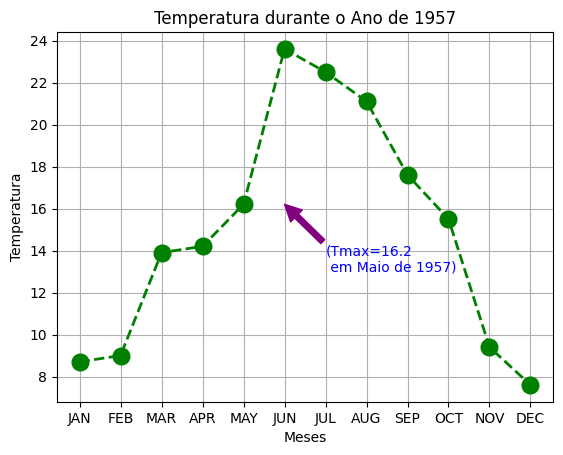

In [27]:
plt.plot(x_periodo, y_temperaturas_1957, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.annotate('(Tmax=16.2\n em Maio de 1957)', color = 'blue', xy=(5, 16.2), xytext=(6,13), arrowprops=dict(color='purple'))
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid();#axis=‘both’,’x’ou ’y’ 


In [28]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<ipython-input-38-41c57e2d931f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


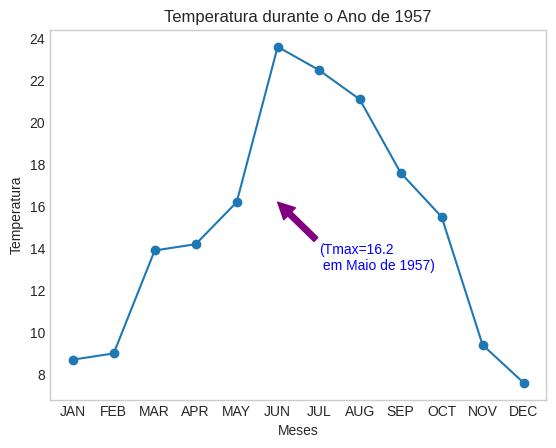

In [38]:
plt.rcdefaults()
plt.style.use('seaborn-whitegrid')

plt.plot(x_periodo, y_temperaturas_1957, marker='o')
plt.annotate('(Tmax=16.2\n em Maio de 1957)', color = 'blue', xy=(5, 16.2), xytext=(6,13), arrowprops=dict(color='purple'))

plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid();#axis=‘both’,’x’ou ’y’ 


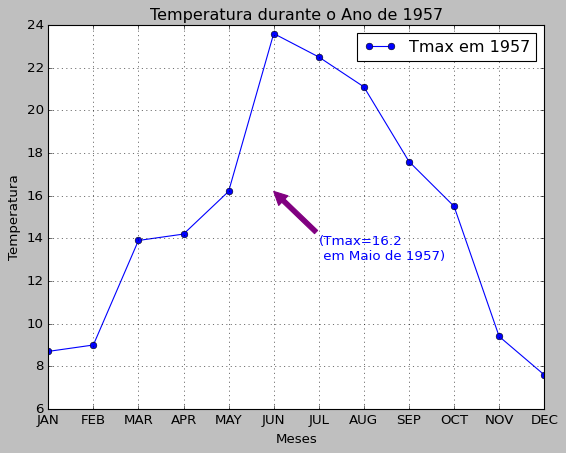

In [33]:
plt.rcdefaults()
plt.style.use('classic')
plt.plot(x_periodo, y_temperaturas_1957, marker='o', label="Tmax em 1957")

plt.annotate('(Tmax=16.2\n em Maio de 1957)', color = 'blue', xy=(5, 16.2), xytext=(6,13), arrowprops=dict(color='purple'))

plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid()
plt.legend();


<ipython-input-34-8cf5a4a21cd4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


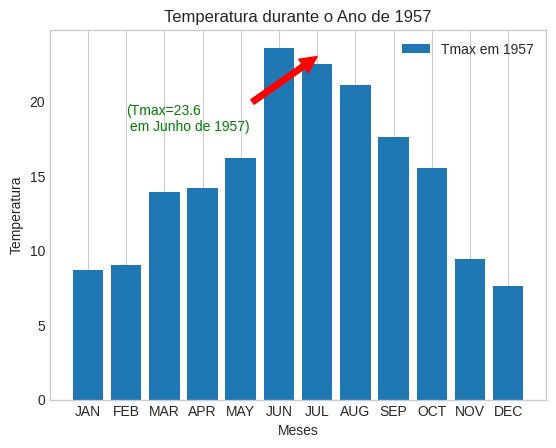

In [34]:
plt.rcdefaults()
plt.style.use('seaborn-whitegrid')
plt.bar(x_periodo, y_temperaturas_1957, label="Tmax em 1957")

plt.annotate('(Tmax=23.6\n em Junho de 1957)', color = 'green', xy=(6, 23), xytext=(1,18), arrowprops=dict(color='red'))

plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid(axis='y')
plt.legend();


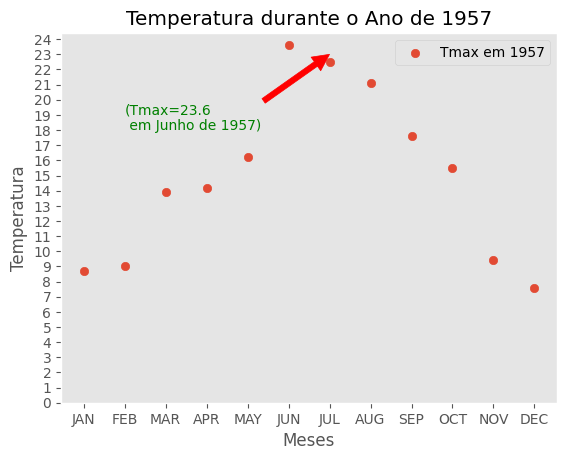

In [39]:
plt.rcdefaults()
plt.style.use('ggplot')
plt.scatter(x_periodo, y_temperaturas_1957, label="Tmax em 1957")

plt.annotate('(Tmax=23.6\n em Junho de 1957)', color = 'green', xy=(6, 23), xytext=(1,18), arrowprops=dict(color='red'))

plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid(axis='both')
plt.legend()

plt.xticks(x_periodo, rotation = 'horizontal')
plt.yticks(np.arange(0, y_temperaturas_1957.max()+1));


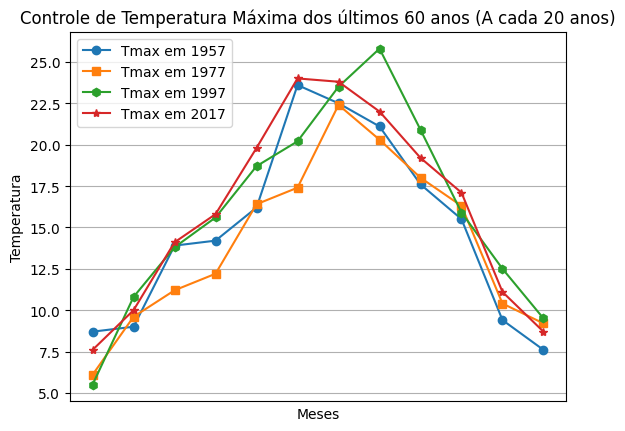

In [40]:
plt.rcdefaults()

plt.plot(x_periodo, y_temperaturas_1957, label = "Tmax em 1957", marker = 'o')
plt.plot(x_periodo, y_temperaturas_1977, label = "Tmax em 1977", marker = 's')
plt.plot(x_periodo, y_temperaturas_1997, label = "Tmax em 1997", marker = 'h')
plt.plot(x_periodo, y_temperaturas_2017, label = "Tmax em 2017", marker = '*')

plt.title("Controle de Temperatura Máxima dos últimos 60 anos (A cada 20 anos)")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid()
plt.xticks([]) # Oculta rótulo x
plt.legend();

Text(0.5, 0, 'Meses')

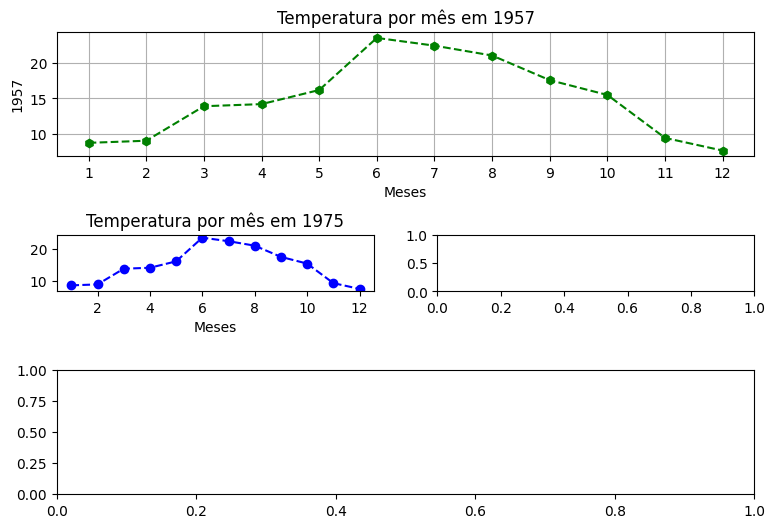

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')

weather.head()

# Pegando a numeração dos meses avaliados
x_periodo = weather[weather['Year'] == 1957].Month

# Pegando os dados de temperaturas
y_temperaturas_1957 = weather[weather['Year'] == 1957].Tmax
y_temperaturas_1977 = weather[weather['Year'] == 1977].Tmax
y_temperaturas_1997 = weather[weather['Year'] == 1997].Tmax
y_temperaturas_2017 = weather[weather['Year'] == 2017].Tmax


gridsize = (7, 2)
fig = plt.figure(figsize=(9, 6)) #default (6.4, 4.8)
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # 1957
ax2 = plt.subplot2grid(gridsize, (3, 0)) # 1977
ax3 = plt.subplot2grid(gridsize, (3, 1)) # 1997
ax4 = plt.subplot2grid(gridsize, (5, 0), colspan=2, rowspan=2) # 2017

ax1.set_title('Temperatura por mês em 1957')
ax1.plot(x_periodo, y_temperaturas_1957, 'gh--')
ax1.set_xlabel('Meses')
ax1.set_ylabel('1957')
ax1.set_xticks(x_periodo)
ax1.grid()

ax2.set_title('Temperatura por mês em 1977')
ax2.plot(x_periodo, y_temperaturas_1977, 'bo--')
ax2.set_xlabel('Meses')
ax2.set_ylabel('1977')
ax2.set_xticks(x_periodo)
ax2.grid()

ax3.set_title('Temperatura por mês em 1997')
ax3.plot(x_periodo, y_temperaturas_1997, 'rs--')
ax3.set_xlabel('Meses')
ax3.set_ylabel('1997')
ax3.set_xticks(x_periodo)
ax3.grid()

ax4.set_title('Temperatura por mês em 2017')
ax4.plot(x_periodo, y_temperaturas_2017, 'm*--')
ax4.set_xlabel('Meses')
ax4.set_ylabel('2017')
ax4.set_xticks(x_periodo)
ax4.grid()